In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [308]:
# pip install pandas_profiling
import pandas_profiling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
col_names =["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", 
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]


train = pd.read_table("train.txt",sep=",", header=None, names = col_names)
test = pd.read_table("test.txt",sep=",", header=None, names = col_names)

In [84]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [85]:
train.drop_duplicates(subset=['duration'])

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.00,0.00,0.05,0.00,normal,20
23,5607,udp,other,SF,147,105,0,0,0,0,...,0.00,0.85,1.00,0.0,0.00,0.00,0.00,0.00,normal,21
25,507,tcp,telnet,SF,437,14421,0,0,0,0,...,0.10,0.05,0.00,0.0,0.53,0.00,0.02,0.16,normal,20
35,1,udp,private,SF,105,147,0,0,0,0,...,0.12,0.05,0.05,0.0,0.00,0.00,0.00,0.00,normal,19
42,2,tcp,smtp,SF,1591,372,0,0,0,0,...,0.81,0.02,0.01,0.0,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125675,2644,udp,other,SF,147,105,0,0,0,0,...,0.00,0.84,1.00,0.0,0.00,0.00,0.00,0.00,normal,21
125709,4081,tcp,other,RSTR,1,0,0,0,0,0,...,0.01,0.71,1.00,0.0,0.00,0.00,1.00,1.00,portsweep,15
125713,5430,tcp,other,RSTR,1,0,0,0,0,0,...,0.01,0.74,1.00,0.0,0.00,0.00,1.00,1.00,portsweep,15
125756,11680,tcp,telnet,SF,738,103904,0,0,0,0,...,0.26,0.07,0.02,0.0,0.00,0.00,0.00,0.00,normal,20


In [86]:
test.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21


In [87]:
test.drop_duplicates(subset=['duration'])

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
14,37,tcp,telnet,SF,773,364200,0,0,0,0,...,0.16,0.05,0.03,0.04,0.00,0.77,0.00,0.07,normal,14
30,805,tcp,http,RSTR,76944,1,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.07,0.07,apache2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22243,7597,tcp,telnet,SF,0,44,0,0,0,0,...,0.70,0.03,0.00,0.00,0.33,0.47,0.12,0.08,processtable,18
22299,8216,tcp,telnet,SF,0,15,0,0,0,0,...,0.14,0.04,0.00,0.00,0.00,0.03,0.08,0.28,processtable,7
22353,7477,tcp,telnet,SF,0,44,0,0,0,0,...,0.81,0.03,0.00,0.00,0.33,0.41,0.12,0.07,processtable,18
22432,7264,tcp,telnet,SF,0,44,0,0,0,0,...,0.96,0.02,0.00,0.00,0.33,0.35,0.04,0.02,processtable,18


In [88]:
train_final = train.merge(test.drop_duplicates(subset=['duration']), how='left')
train_final

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [89]:
train_final['attack_1_0'] = np.where(train_final['attack']=='normal','yes','no')

In [93]:
train_final['attack'] = np.where(train_final['attack_1_0']=='yes','attack','normal')

In [94]:
train_final

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_1_0
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,attack,20,yes
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,attack,15,yes
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,normal,19,no
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,attack,21,yes
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,attack,21,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,normal,20,no
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,attack,21,yes
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,attack,18,yes
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,normal,20,no


In [95]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Data columns (total 44 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [96]:
train_final.protocol_type.value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [97]:
train_final.service.value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
harvest          2
aol              2
http_2784        1
Name: service, Length: 70, dtype: int64

In [98]:
train_final.flag.value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [99]:
train_final.attack_1_0.value_counts()

yes    67343
no     58630
Name: attack_1_0, dtype: int64

In [100]:
train_final.to_csv("train_final.csv")

In [102]:
train_final.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [103]:
# profiling using pandas profiling
report = pandas_profiling.ProfileReport(train_final)

In [104]:
report.to_file(output_file = 'profilereport.html')

### Basic Exploratory Analysis

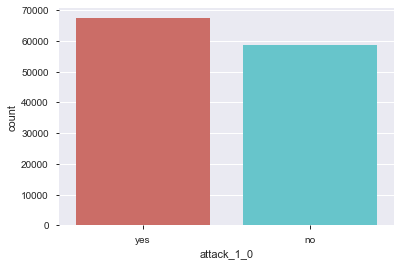

In [109]:
import seaborn as sns
sns.countplot(x='attack_1_0',data=train_final, palette='hls')
plt.show()

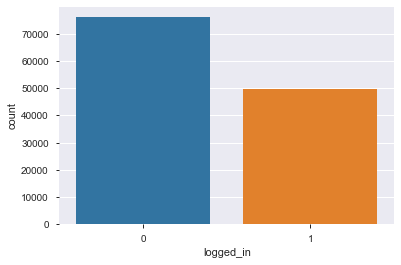

In [111]:
sns.countplot(x="logged_in", data=train_final)
plt.show()

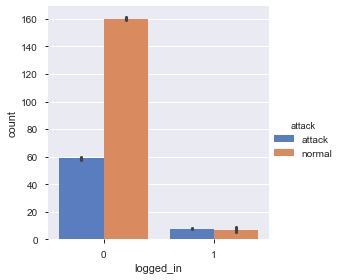

In [113]:
sns.factorplot(x="logged_in", y = 'count', hue="attack", data=train_final,size=4, kind="bar", palette="muted")

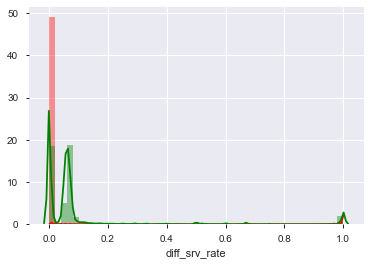

In [114]:
sns.distplot( train_final[train_final.logged_in == 1]['diff_srv_rate'], color = 'r')
sns.distplot( train_final[train_final.logged_in == 0]['diff_srv_rate'], color = 'g')

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [117]:
train_final.groupby('attack_1_0').mean().T

attack_1_0,no,yes
duration,423.320689,168.587396
src_bytes,82820.141327,13133.279331
dst_bytes,37524.482159,4329.685223
land,0.000307,0.000104
wrong_fragment,0.048746,0.000000
urgent,0.000068,0.000148
hot,0.174262,0.230655
num_failed_logins,0.001040,0.001381
logged_in,0.034027,0.710646
num_compromised,0.017568,0.507076


In [118]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Data columns (total 44 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [120]:
numeric_var_names=[key for key in dict(train_final.dtypes) if dict(train_final.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train_final.dtypes) if dict(train_final.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']
['protocol_type', 'service', 'flag', 'attack', 'attack_1_0']


In [122]:
train_final_num=train_final[numeric_var_names]
train_final_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [123]:
train_final_cat=train_final[cat_var_names]
train_final_cat.head()

,protocol_type,service,flag,attack,attack_1_0
0,tcp,ftp_data,SF,attack,yes
1,udp,other,SF,attack,yes
2,tcp,private,S0,normal,no
3,tcp,http,SF,attack,yes
4,tcp,http,SF,attack,yes


### Creating Data audit Report

In [124]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_final_num.apply(lambda x: var_summary(x)).T

In [140]:
num_summary.round()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.0,0.0,2605.0,6.783500e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9591.0,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45567.0,44.0,5870331.0,3.446079e+13,0.0,0.0,0.0,0.0,0.0,44.0,276.0,848.0,1480.0,54540.0,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.0,0.0,4021269.0,1.617061e+13,0.0,0.0,0.0,0.0,0.0,0.0,516.0,3376.0,8314.0,25519.0,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.0,0.0,2.0,5.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.0,0.0,24.0,5.730000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.479000e+03


In [128]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

train_final_num=train_final_num.apply(lambda x: outlier_capping(x))

In [148]:
train_final_num_c=train_final_num [['count','diff_srv_rate','dst_bytes','dst_host_count','dst_host_diff_srv_rate','dst_host_rerror_rate','dst_host_same_src_port_rate','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_count','dst_host_srv_diff_host_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate','duration','hot','last_flag','rerror_rate','src_bytes','srv_count','srv_diff_host_rate','srv_rerror_rate','srv_serror_rate','logged_in','serror_rate','same_srv_rate','num_compromised' ]]
train_final_num_c
#train_final_num.corr()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,rerror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,logged_in,serror_rate,same_srv_rate,num_compromised
0,2,0.00,0,150,0.03,0.05,0.17,0.17,0.00,25,...,0.0,491,2,0.00,0.0,0.0,0,0.0,1.00,0
1,13,0.15,0,255,0.60,0.00,0.88,0.00,0.00,1,...,0.0,146,1,0.00,0.0,0.0,0,0.0,0.08,0
2,123,0.07,0,255,0.05,0.00,0.00,0.10,1.00,26,...,0.0,0,6,0.00,0.0,1.0,0,1.0,0.05,0
3,5,0.00,8153,30,0.00,0.00,0.03,1.00,0.03,255,...,0.0,232,5,0.00,0.0,0.2,1,0.2,1.00,0
4,30,0.00,420,255,0.00,0.00,0.00,1.00,0.00,255,...,0.0,199,32,0.09,0.0,0.0,1,0.0,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,184,0.06,0,255,0.06,0.00,0.00,0.10,1.00,25,...,0.0,0,25,0.00,0.0,1.0,0,1.0,0.14,0
125969,2,0.00,145,255,0.01,0.00,0.01,0.96,0.00,244,...,0.0,105,2,0.00,0.0,0.0,0,0.0,1.00,0
125970,1,0.00,384,255,0.06,0.01,0.00,0.12,0.72,30,...,0.0,2231,1,0.00,0.0,0.0,1,0.0,1.00,0
125971,144,0.05,0,255,0.05,0.00,0.00,0.03,1.00,8,...,0.0,0,8,0.00,0.0,1.0,0,1.0,0.06,0


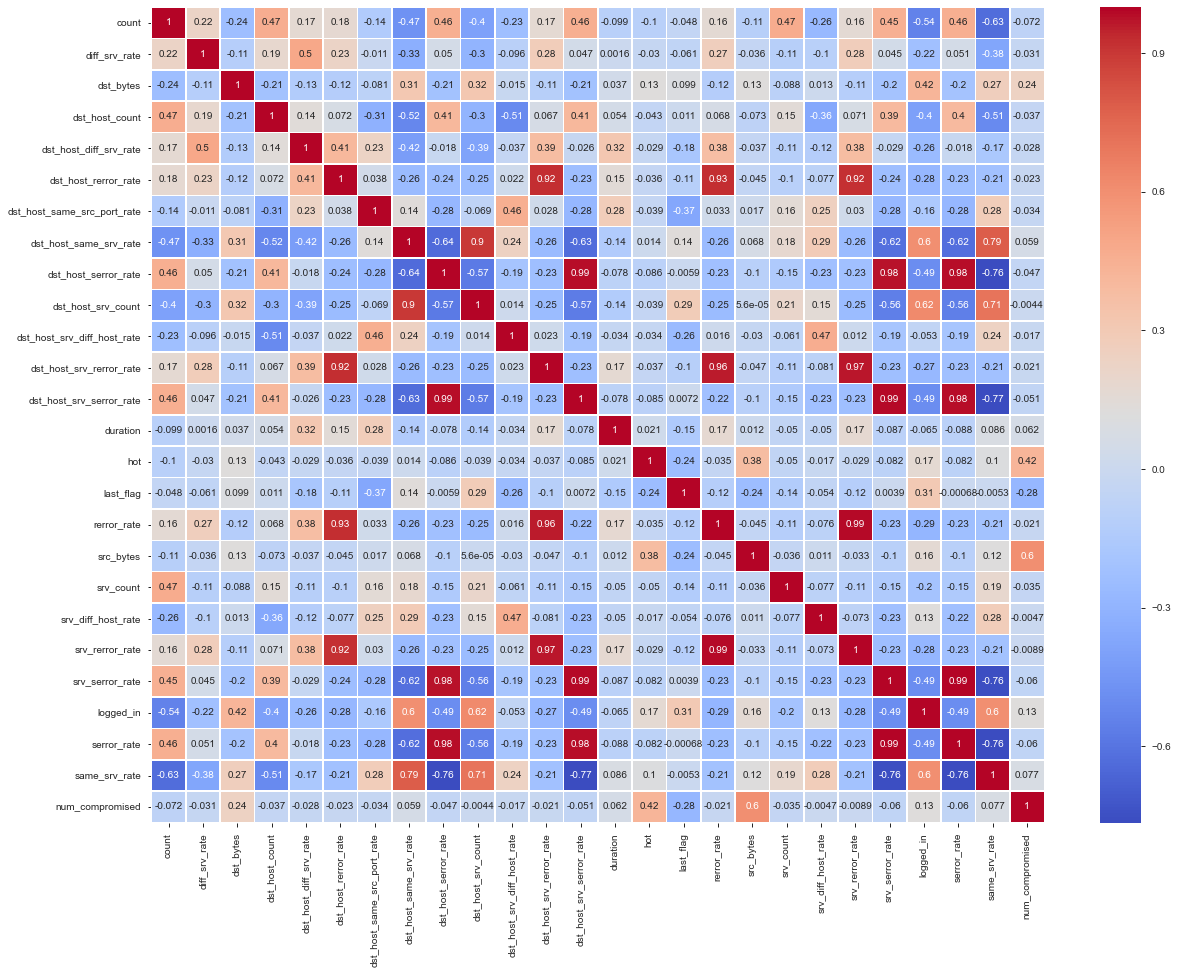

In [371]:
import seaborn as sns
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(train_final_num_c.corr(),annot=True,cmap='coolwarm',linewidths=0.5)

In [152]:
# Create Data audit Report for categorical variables for test
def cat_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2),x.value_counts(),x.unique()], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT','ColumnNames','UniqueValues'])
cat_summary_train=train_final_cat.apply(lambda x:cat_summary(x))
cat_summary_train.T

,N,NMISS,MODE,FREQ,PERCENT,ColumnNames,UniqueValues
protocol_type,125973,0,tcp,102689,81.52,tcp 102689 udp 14993 icmp 8291 N...,"[tcp, udp, icmp]"
service,125973,0,http,40338,32.02,http 40338 private 21853 domain_u...,"[ftp_data, other, private, http, remote_job, n..."
flag,125973,0,SF,74945,59.49,SF 74945 S0 34851 REJ 1123...,"[SF, S0, REJ, RSTR, SH, RSTO, S1, RSTOS0, S3, ..."
attack,125973,0,attack,67343,53.46,"attack 67343 normal 58630 Name: attack, ...","[attack, normal]"
attack_1_0,125973,0,yes,67343,53.46,"yes 67343 no 58630 Name: attack_1_0, dt...","[yes, no]"


In [153]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    #col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [154]:
cat_var_names

['protocol_type', 'service', 'flag', 'attack', 'attack_1_0']

In [155]:
#for c_feature in categorical_features
train_final_cat_new = train_final_cat
for c_feature in cat_var_names:
    train_final_cat_new[c_feature] = train_final_cat_new[c_feature].astype('category')
    train_final_cat_new = create_dummies(train_final_cat_new , c_feature )

In [157]:
train_final_cat_new.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_normal,attack_1_0_yes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [348]:
train_final_new=pd.concat([train_final_num,train_final_cat_new],axis=1)

In [349]:
train_final_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_normal,attack_1_0_yes
0,0.0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0.0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [350]:
train_final_new.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'attack_normal', 'attack_1_0_yes'],
      dtype='object', length=122)

##### Feature Selection

#### Dropping columns based on data audit report
        - Based on low variance (near zero variance)
        - High missings (>25% missings)
        - High correlations between two numerical variables

In [351]:
train_final_new2 = train_final_new.drop(['num_outbound_cmds','is_host_login','land','urgent','num_shells','root_shell','su_attempted','num_failed_logins','is_guest_login','num_access_files','dst_host_srv_diff_host_rate','diff_srv_rate','dst_host_diff_srv_rate','wrong_fragment','srv_diff_host_rate','dst_host_rerror_rate','dst_host_same_src_port_rate','dst_bytes','dst_host_same_srv_rate','dst_host_srv_serror_rate','num_outbound_cmds','dst_host_serror_rate','duration','num_root','srv_rerror_rate','hot','srv_serror_rate','dst_host_srv_rerror_rate','rerror_rate','num_compromised','same_srv_rate','serror_rate','num_file_creations','src_bytes','attack_normal'], axis=1)
train_final_new2

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,last_flag,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_1_0_yes
0,0,2,2,150,25,20,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,13,1,255,1,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,123,6,255,26,19,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,5,5,30,255,21,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,30,32,255,255,21,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,184,25,255,25,20,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,0,2,2,255,244,21,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,1,1,1,255,30,18,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,144,8,255,8,20,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [161]:
train_final_new.drop(columns=['num_outbound_cmds','is_host_login','land','urgent','num_shells','root_shell','su_attempted',
'num_failed_logins','is_guest_login','num_access_files','dst_host_srv_diff_host_rate','diff_srv_rate',
'dst_host_diff_srv_rate','wrong_fragment','srv_diff_host_rate','dst_host_rerror_rate','dst_host_same_src_port_rate',
'dst_bytes','dst_host_same_srv_rate','dst_host_srv_serror_rate','num_outbound_cmds','dst_host_serror_rate',
'duration','num_root','srv_rerror_rate','hot','srv_serror_rate','dst_host_srv_rerror_rate','rerror_rate','num_compromised',
'same_srv_rate','serror_rate','num_file_creations','src_bytes','attack_normal'],axis=1,inplace=True)

In [345]:
train_final_new

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,last_flag,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_1_0_yes
0,0,2,2,150,25,20,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,13,1,255,1,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,123,6,255,26,19,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,5,5,30,255,21,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,30,32,255,255,21,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,184,25,255,25,20,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,0,2,2,255,244,21,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,1,1,1,255,30,18,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,144,8,255,8,20,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [162]:
train_final_new.columns

Index(['logged_in', 'count', 'srv_count', 'dst_host_count',
       'dst_host_srv_count', 'last_flag', 'protocol_type_tcp',
       'protocol_type_udp', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
    

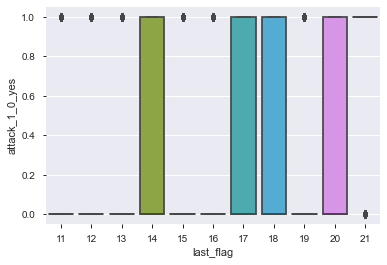

In [163]:

#Bivariate analysis
#box plot
sns.boxplot(x = "last_flag",y = "attack_1_0_yes",data = train_final_new)
plt.show()

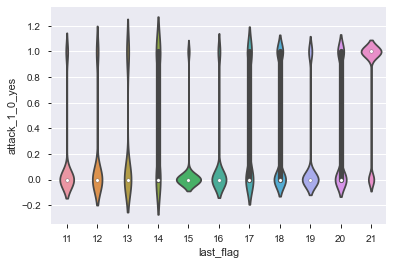

In [164]:
#Bivariate analysis
#violinplot
sns.violinplot(x = "last_flag",y = "attack_1_0_yes",data = train_final_new)
plt.show()

### Variable reduction using WOE or log(odds)

#### Identify important variables using WOE or log(odds) comparing with Y Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

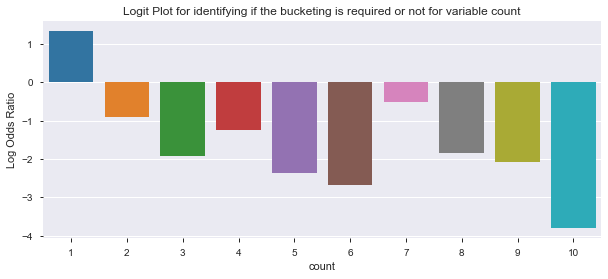

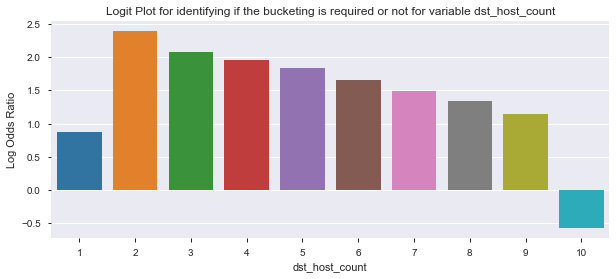

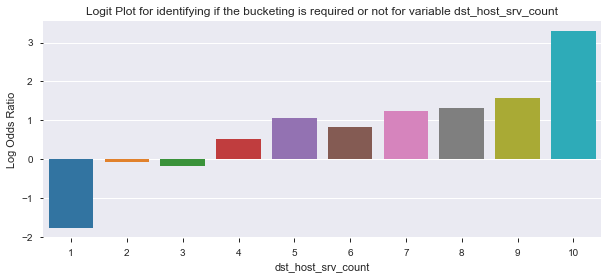

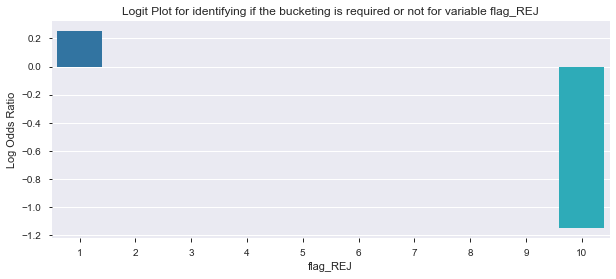

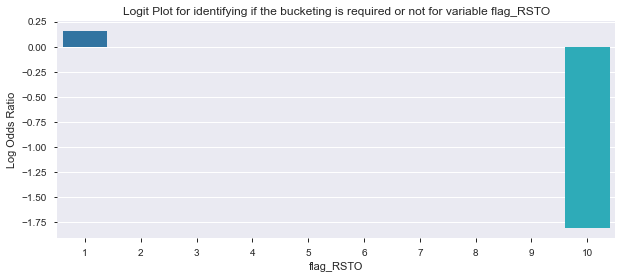

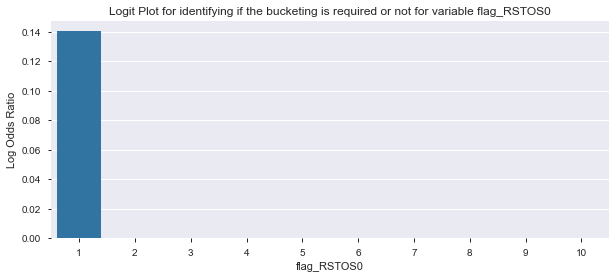

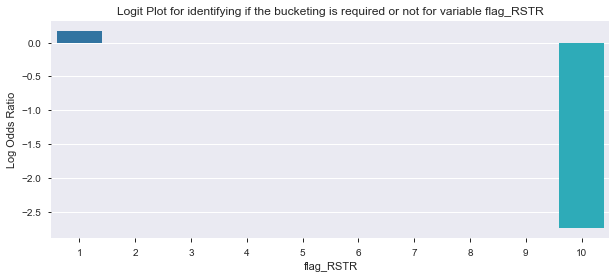

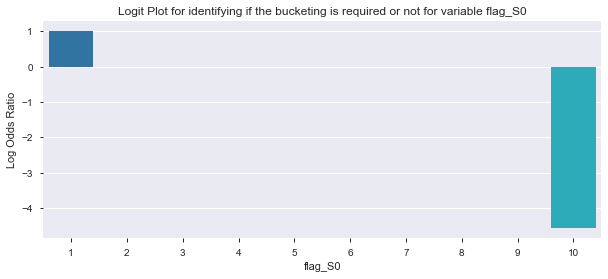

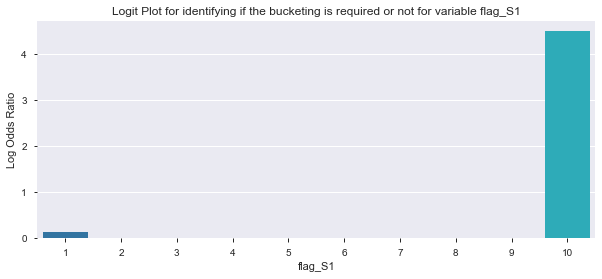

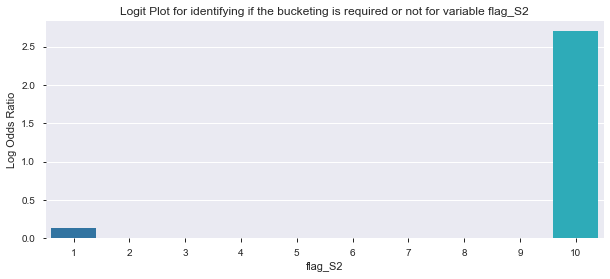

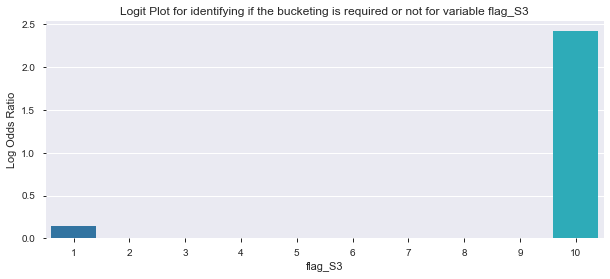

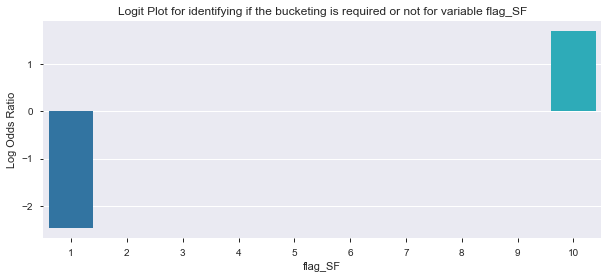

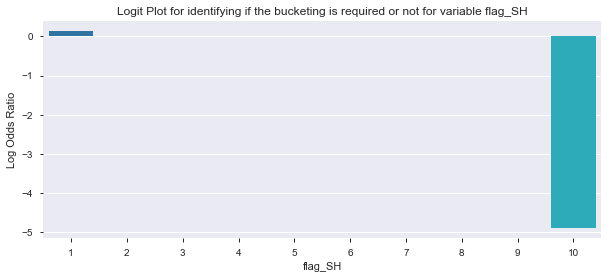

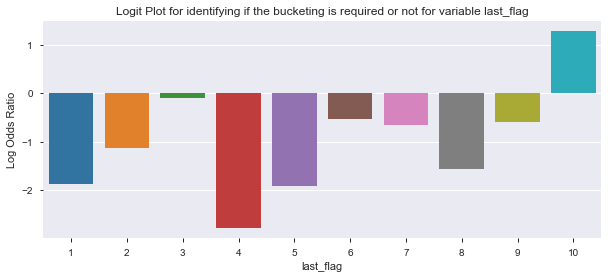

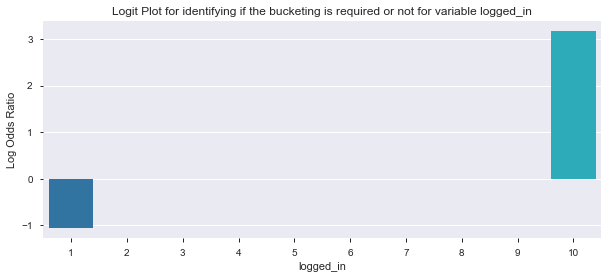

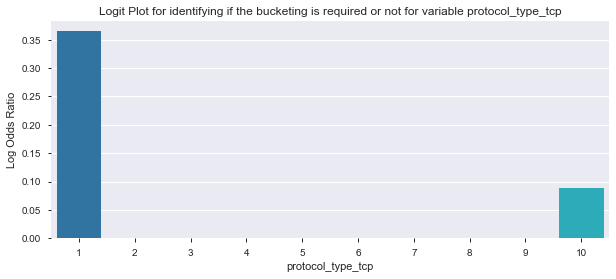

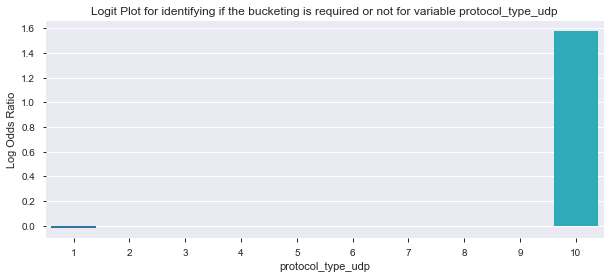

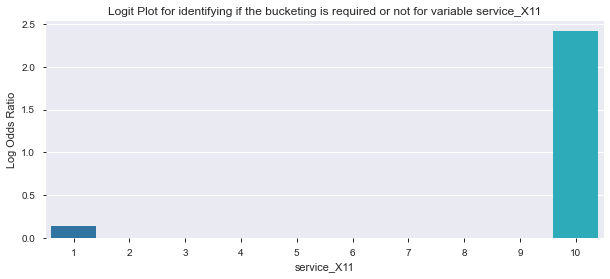

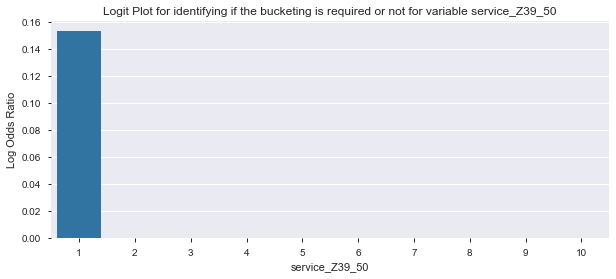

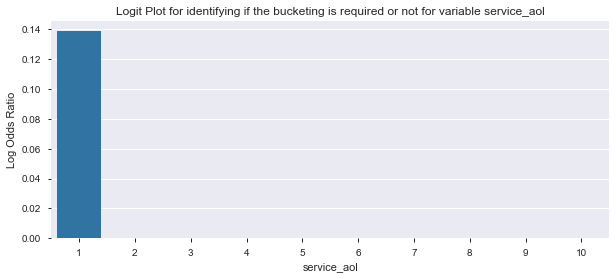

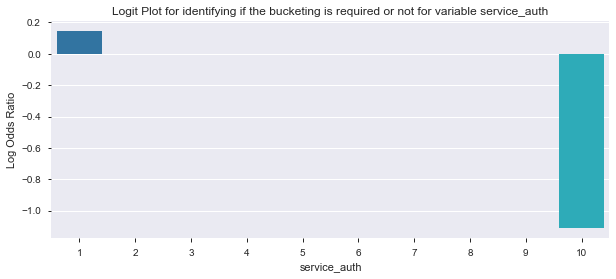

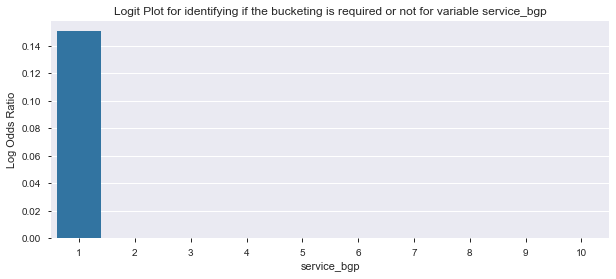

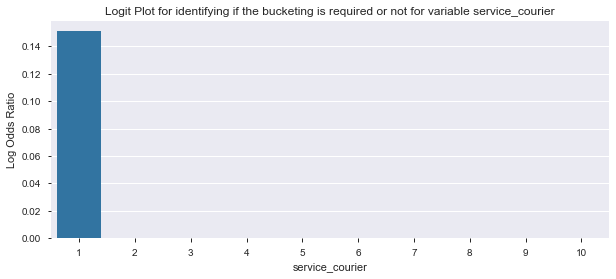

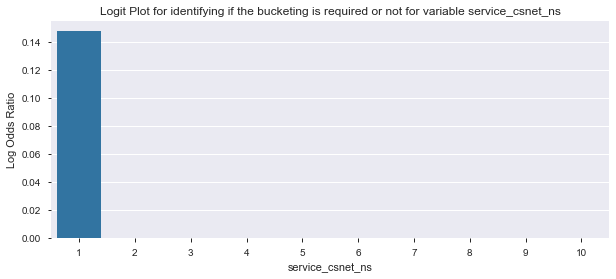

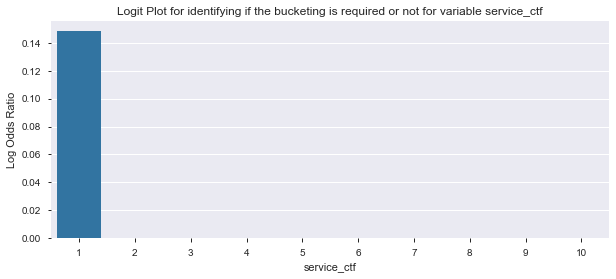

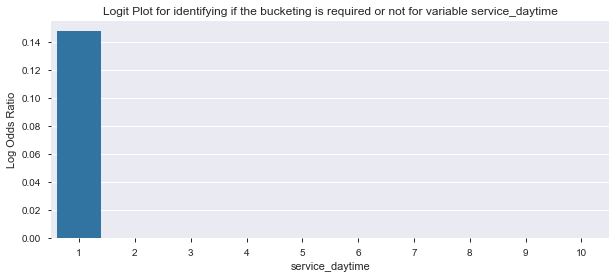

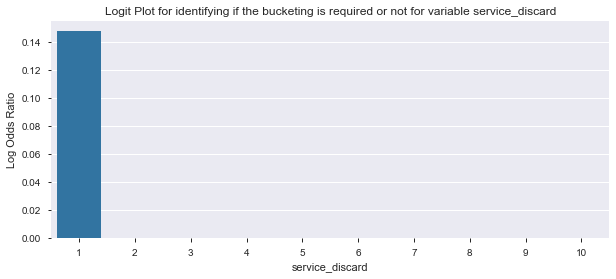

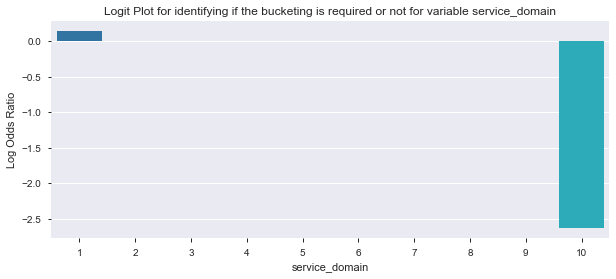

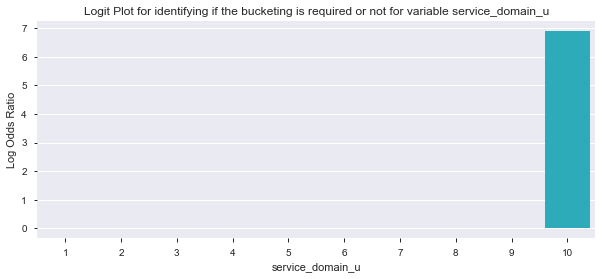

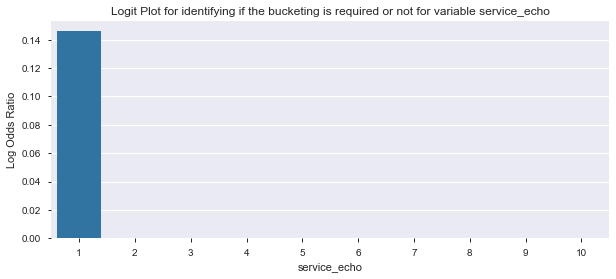

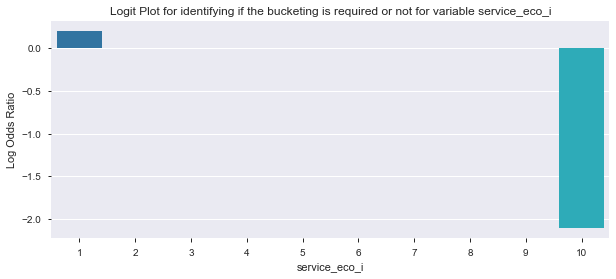

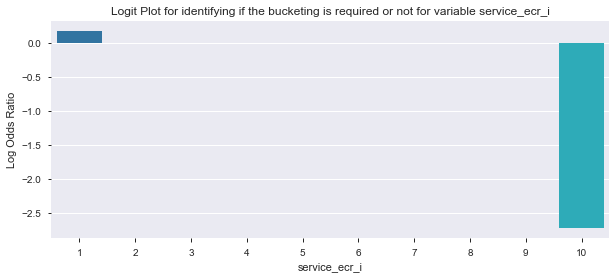

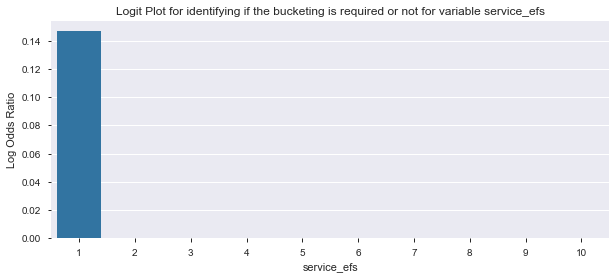

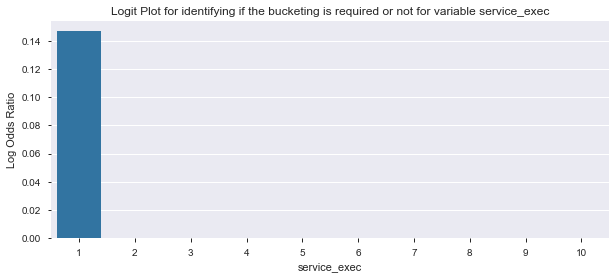

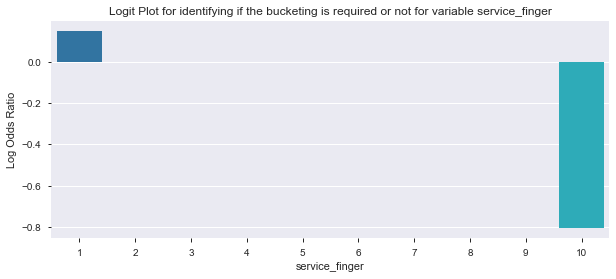

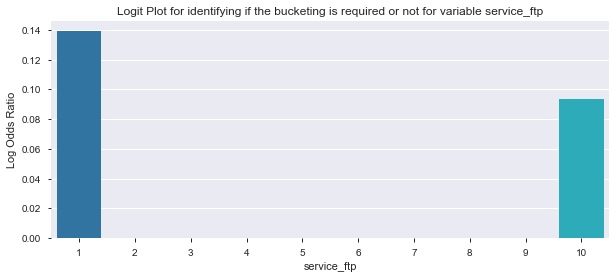

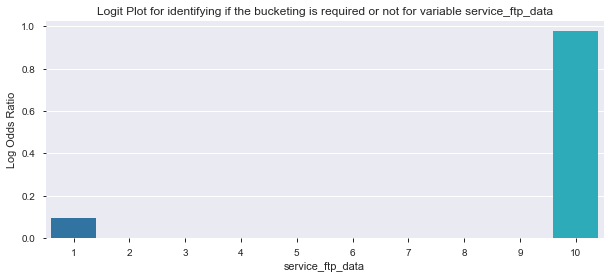

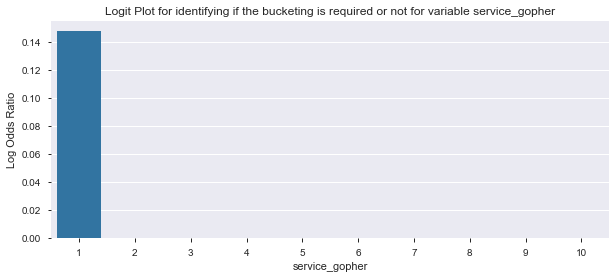

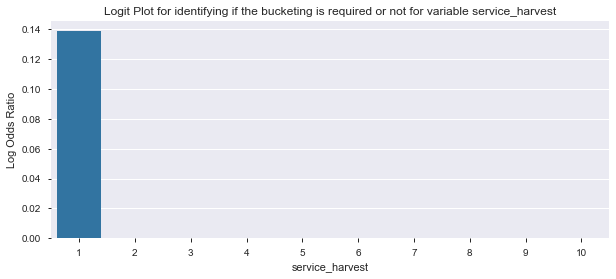

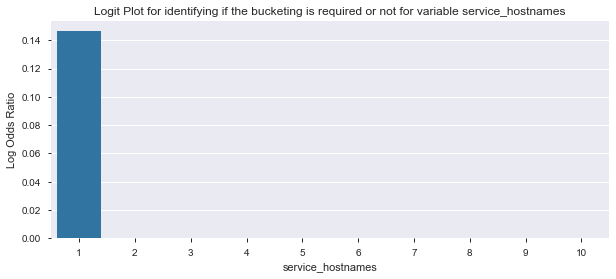

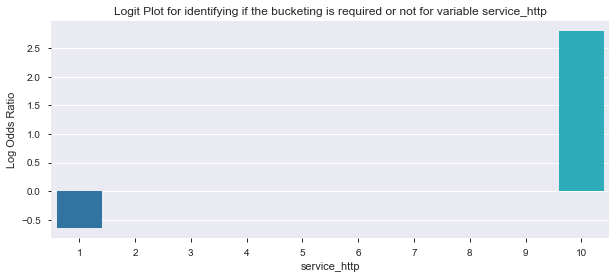

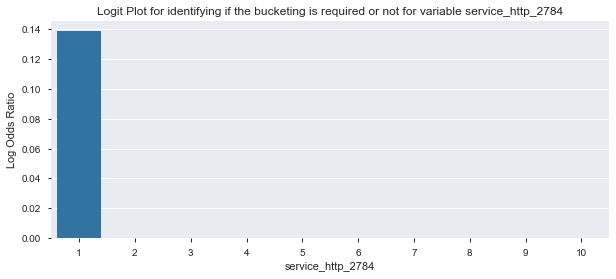

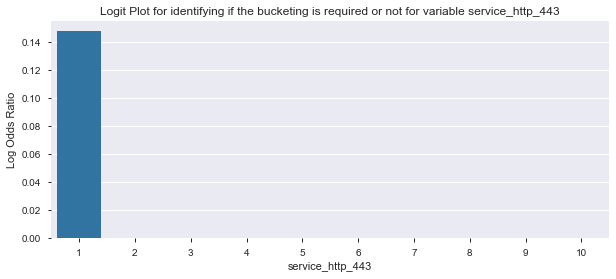

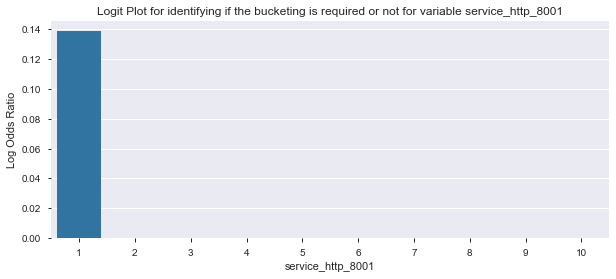

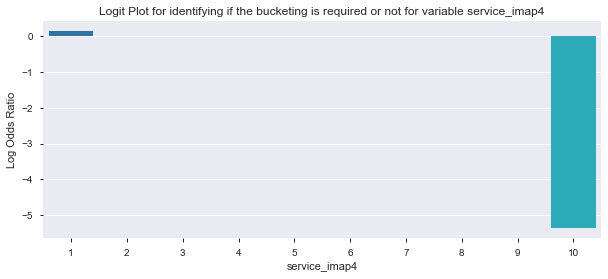

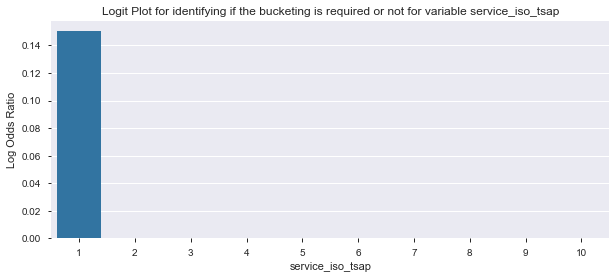

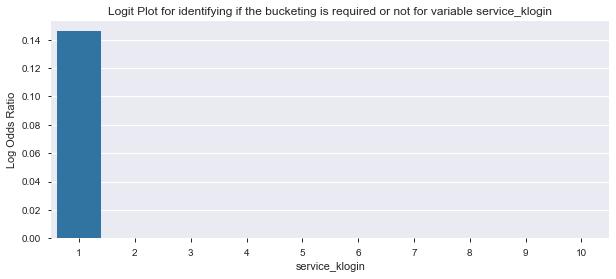

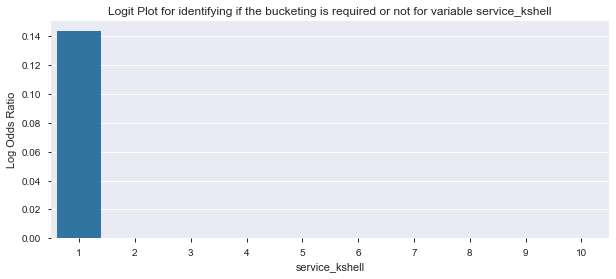

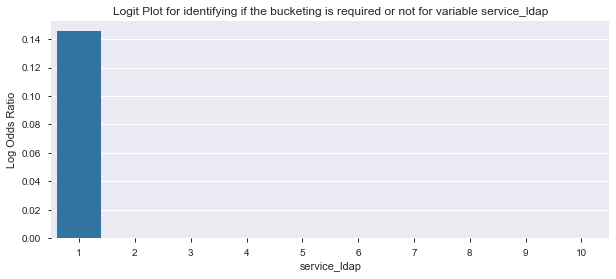

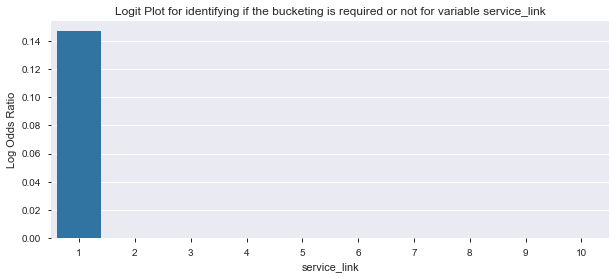

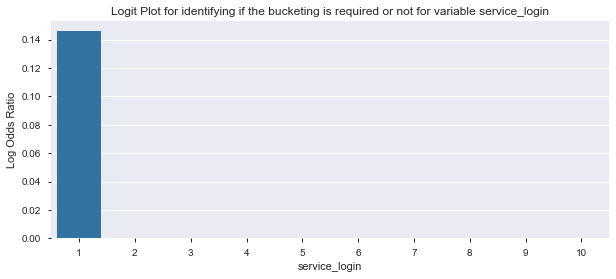

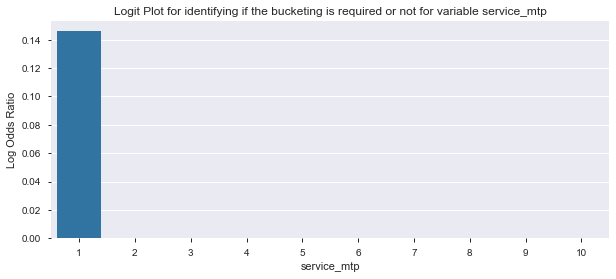

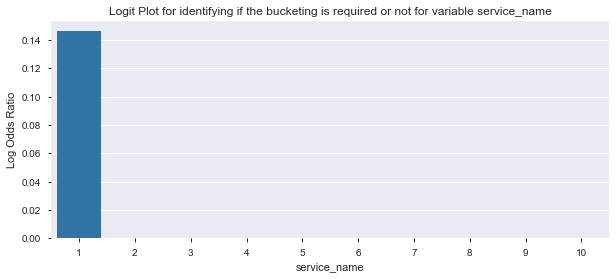

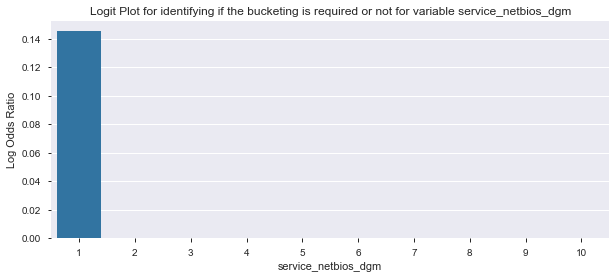

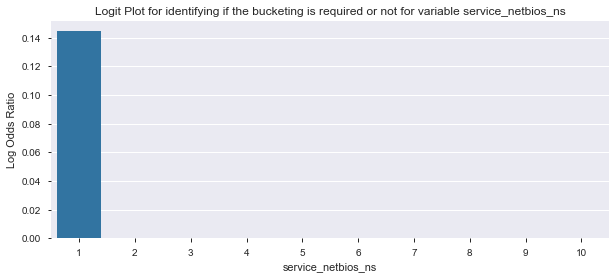

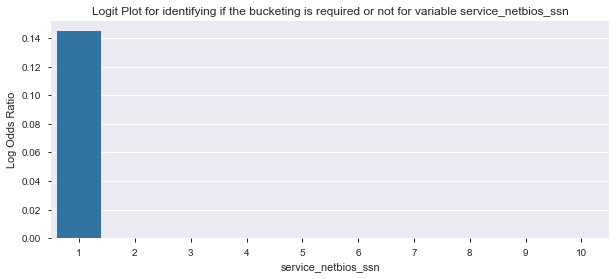

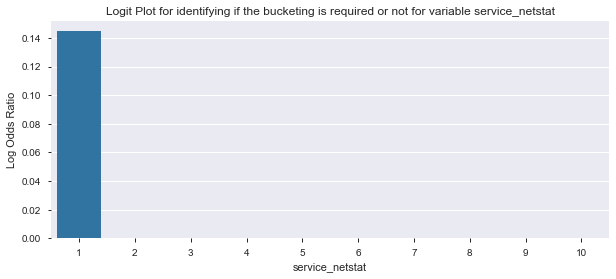

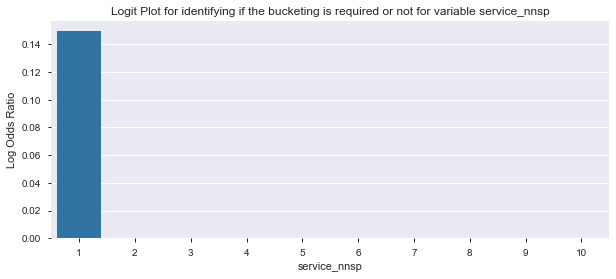

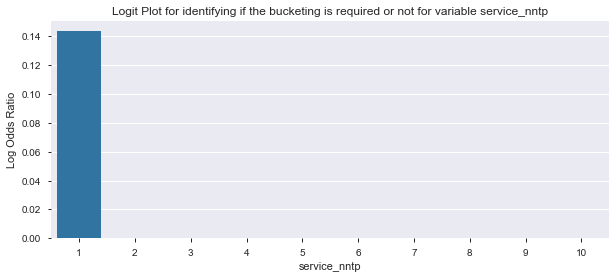

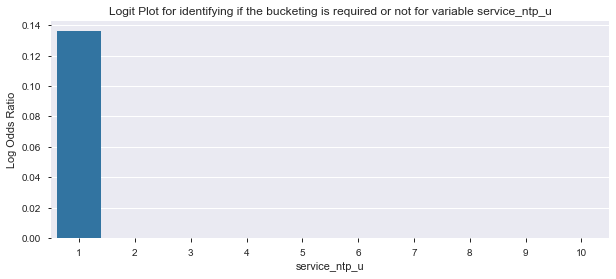

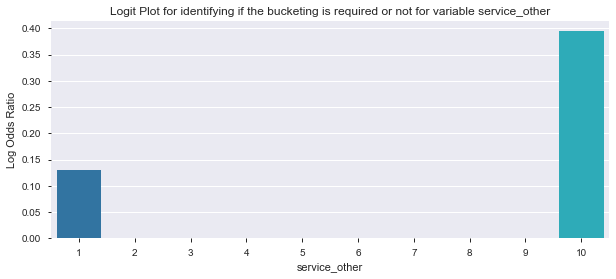

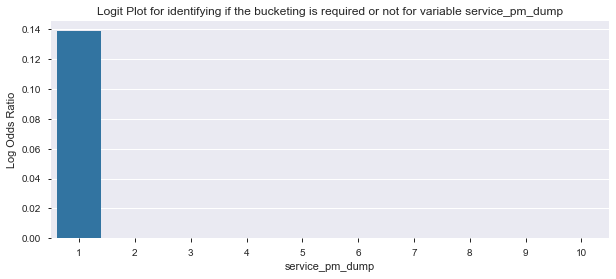

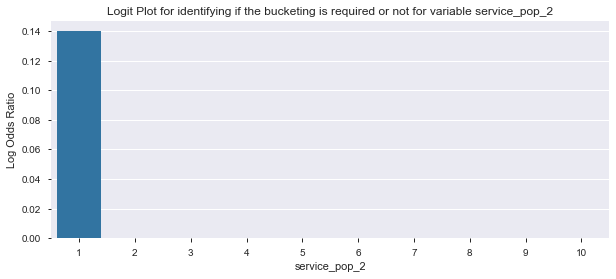

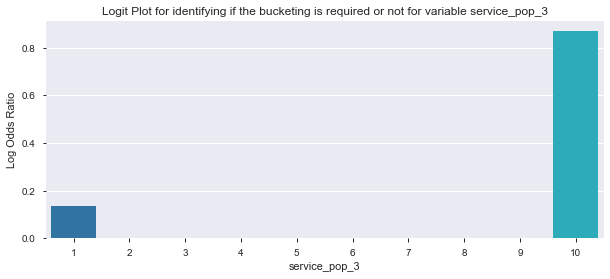

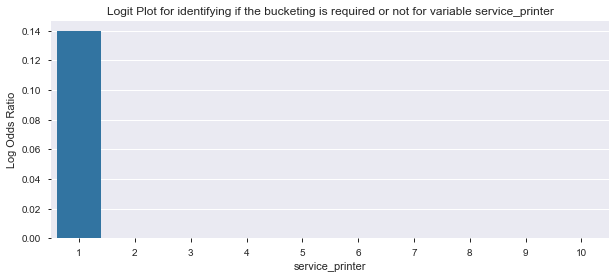

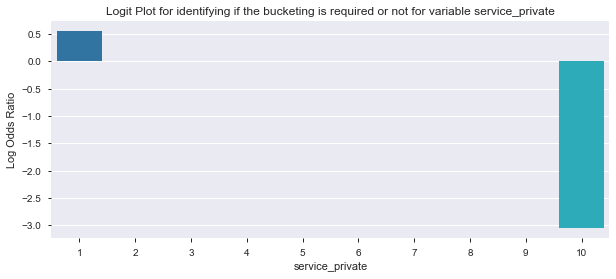

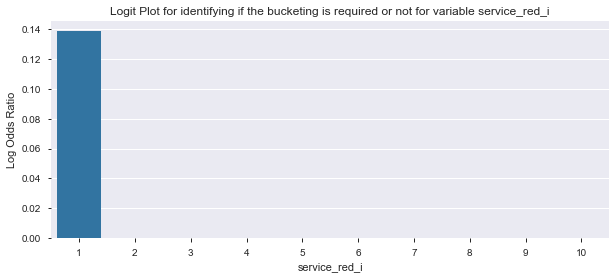

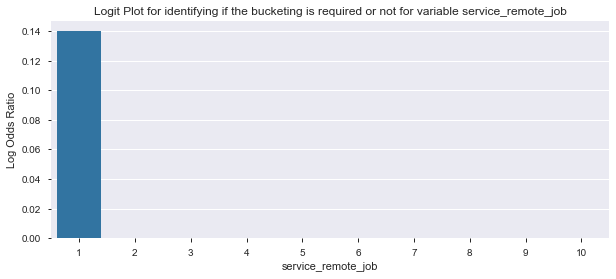

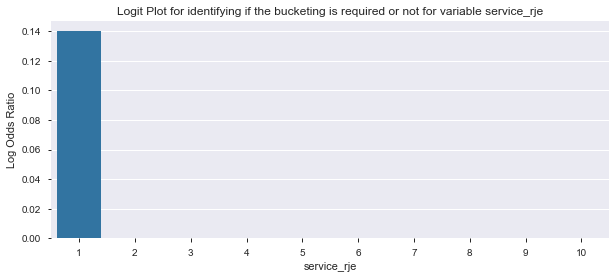

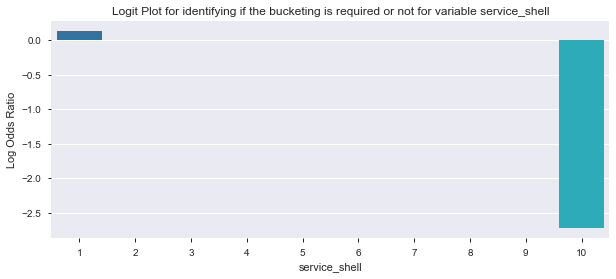

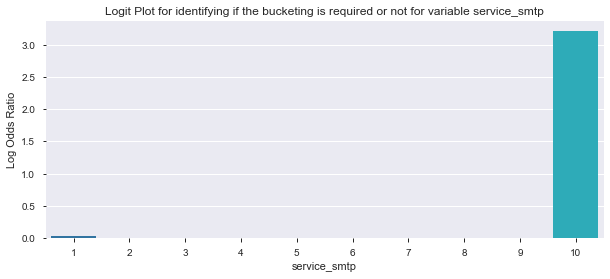

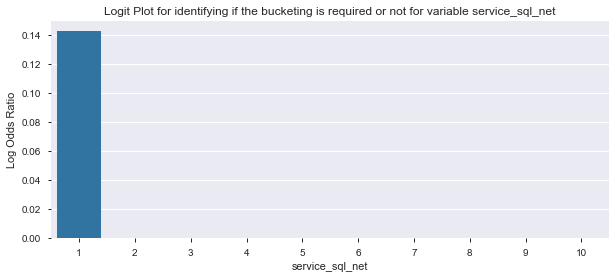

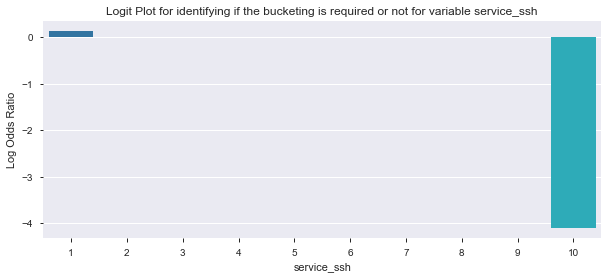

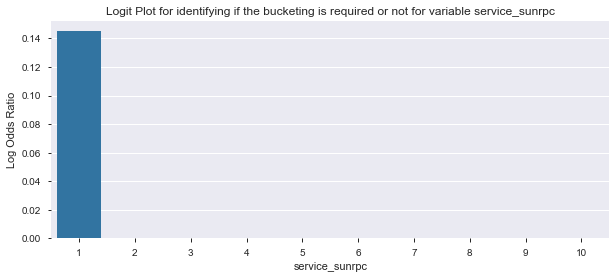

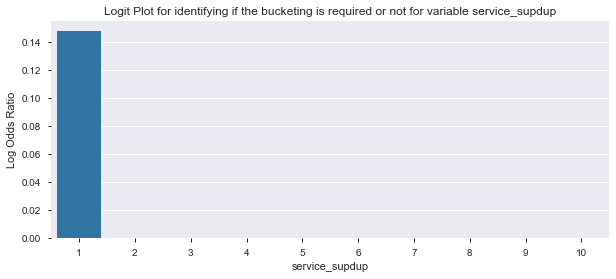

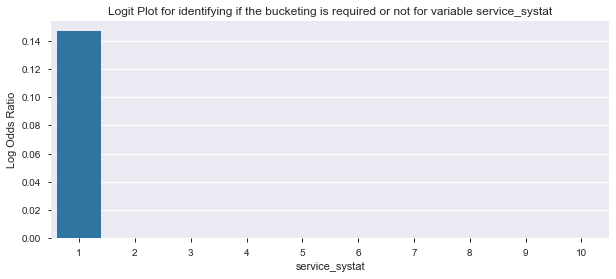

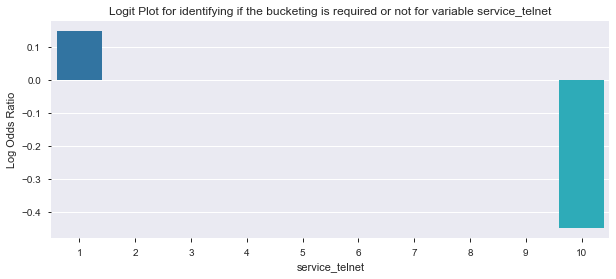

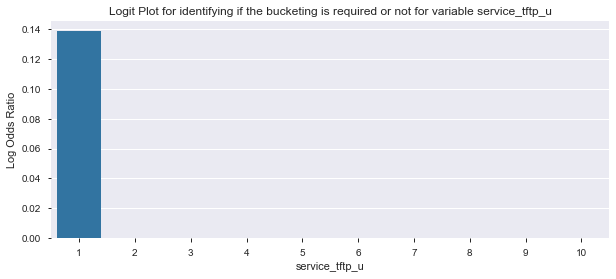

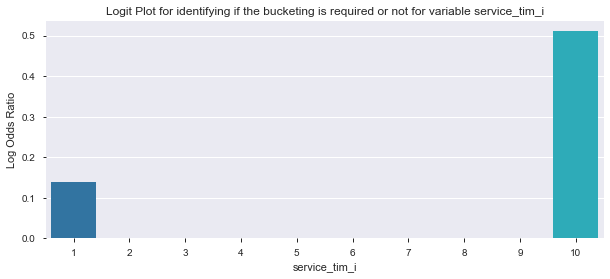

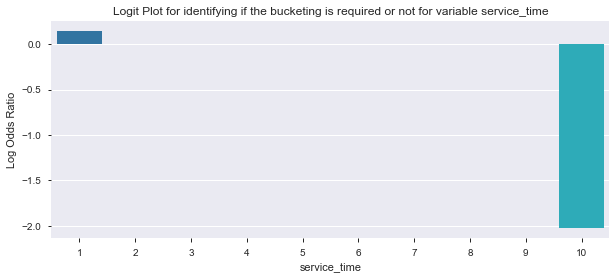

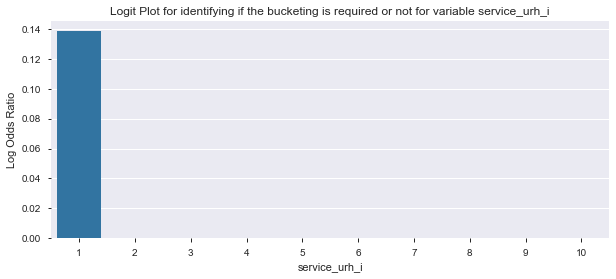

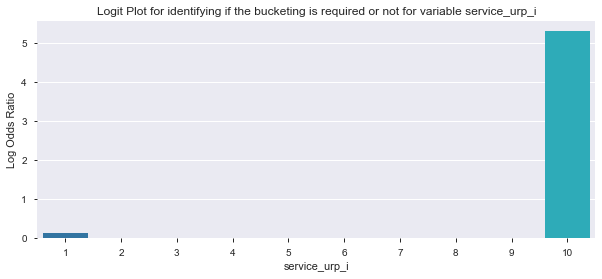

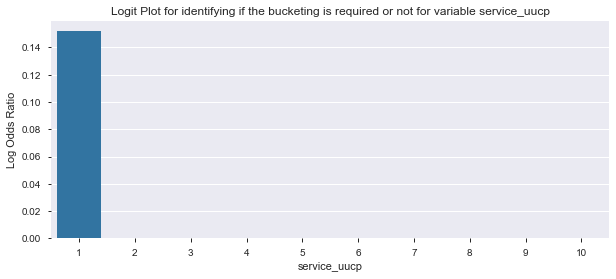

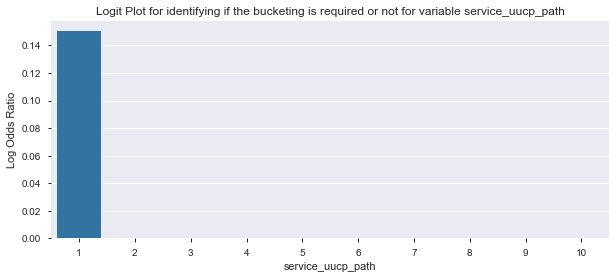

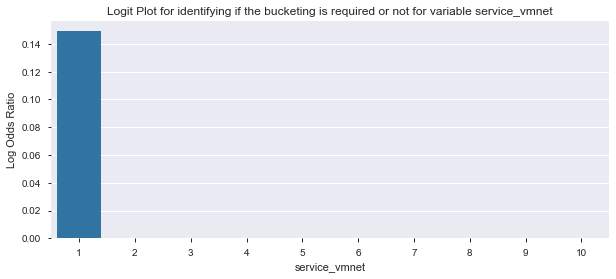

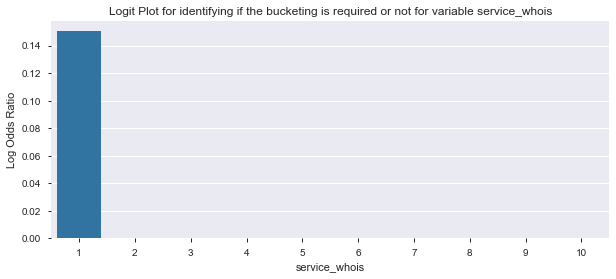

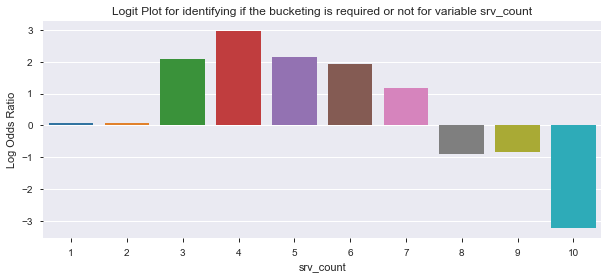

In [192]:
from matplotlib.backends.backend_pdf import PdfPages
bp = PdfPages('WOE Plots.pdf')

for num_variable in train_final_new.columns.difference(['attack_1_0_yes']):
    binned = pd.cut(train_final_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = train_final_new.groupby(binned)['attack_1_0_yes'].sum() / (train_final_new.groupby(binned)['attack_1_0_yes'].count()-train_final_new.groupby(binned)['attack_1_0_yes'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [172]:
bp

### Variable Reduction using univariate Regression (short list based on Somer's D values)

In [341]:
import statsmodels.formula.api as sm

In [352]:
logreg_model = sm.logit('attack_1_0_yes~logged_in',data = train_final_new2).fit()

Optimization terminated successfully.
         Current function value: 0.410201
         Iterations 7


In [353]:
logreg_model = sm.logit('attack_1_0_yes~count',data = train_final_new2).fit()

Optimization terminated successfully.
         Current function value: 0.474707
         Iterations 7


In [354]:
logreg_model = sm.logit('attack_1_0_yes~flag_REJ',data = train_final_new2).fit()

Optimization terminated successfully.
         Current function value: 0.673099
         Iterations 5


In [355]:
logreg_model = sm.logit('attack_1_0_yes~flag_REJ',data = train_final_new2).fit()

Optimization terminated successfully.
         Current function value: 0.673099
         Iterations 5


In [356]:
logreg_model = sm.logit('attack_1_0_yes~flag_SH',data = train_final_new2).fit()

Optimization terminated successfully.
         Current function value: 0.689201
         Iterations 9


In [357]:
logreg_model = sm.logit('attack_1_0_yes~service_tftp_u',data = train_final_new2).fit()

         Current function value: 0.690738
         Iterations: 35


In [358]:
logreg_model = sm.logit('attack_1_0_yes~service_red_i',data = train_final_new2).fit()

         Current function value: 0.690714
         Iterations: 35


In [362]:
p = logreg_model.predict(train_final_new2)

In [361]:
p

0         0.534553
1         0.534553
2         0.534553
3         0.534553
4         0.534553
            ...   
125968    0.534553
125969    0.534553
125970    0.534553
125971    0.534553
125972    0.534553
Length: 125973, dtype: float64

In [363]:
metrics.roc_auc_score(train_final_new2['attack_1_0_yes'],p)

0.5000593974132427

In [364]:
2*metrics.roc_auc_score(train_final_new2['attack_1_0_yes'],p)-1


0.00011879482648535777

In [366]:
train_final_new3 =train_final_new2.loc[:,["logged_in","count","srv_count","dst_host_count","dst_host_srv_count","protocol_type_tcp","protocol_type_udp","last_flag","flag_REJ",
       "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0", "flag_S1","flag_S2", "flag_S3", "flag_SF", "flag_SH","service_X11", "service_Z39_50", "service_aol",
       "service_auth", "service_bgp", "service_courier", "service_csnet_ns","service_ctf", "service_daytime", "service_discard", "service_domain",
       "service_domain_u", "service_echo", "service_eco_i", "service_ecr_i","service_efs", "service_exec", "service_finger", "service_ftp", "service_ftp_data", "service_gopher", "service_harvest",
       "service_hostnames", "service_http", "service_http_2784","service_http_443", "service_http_8001", "service_imap4",
       "service_iso_tsap", "service_klogin", "service_kshell", "service_ldap","service_link", "service_login", "service_mtp", "service_name",
       "service_netbios_dgm", "service_netbios_ns", "service_netbios_ssn","service_netstat", "service_nnsp", "service_nntp", "service_ntp_u",
       "service_other", "service_pm_dump", "service_pop_2", "service_pop_3","service_printer", "service_private", "service_red_i",
       "service_remote_job", "service_rje", "service_shell", "service_smtp","sefrvice_sql_net", "service_ssh", "service_sunrpc", "service_supdup",
       "service_systat", "service_telnet", "service_tftp_u", "service_tim_i","service_time", "service_urh_i", "service_urp_i", "service_uucp",
       "service_uucp_path", "service_vmnet", "service_whois","attack_1_0_yes"]]
train_final_new3

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,protocol_type_tcp,protocol_type_udp,last_flag,flag_REJ,flag_RSTO,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,attack_1_0_yes
0,0,2,2,150,25,1,0,20,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,13,1,255,1,0,1,15,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,123,6,255,26,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,5,5,30,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,30,32,255,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,184,25,255,25,1,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0
125969,0,2,2,255,244,0,1,21,0,0,...,0,0,0,0,0,0,0,0,0,1
125970,1,1,1,255,30,1,0,18,0,0,...,0,0,0,0,0,0,0,0,0,1
125971,0,144,8,255,8,1,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [372]:
somersd_df = pd.DataFrame()
for num_variable in train_final_new3.columns.difference(['attack_1_0_yes']):
    logreg_model = sm.logit(formula = str('attack_1_0_yes ~ ')+str(num_variable), data=train_final_new3)
    result = logreg_model.fit(method='bfgs')
    y1_score = pd.DataFrame(result.predict())
    y1_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(train_final_new3['attack_1_0_yes'],y1_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)
somersd_df

Optimization terminated successfully.
         Current function value: 0.474707
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.615406
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.380618
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.673099
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.686488
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.690128
         Iterations: 23
         Function evaluations: 27
  

Optimization terminated successfully.
         Current function value: 0.688258
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.687861
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.688142
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.688081
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.688008
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.688289
         Iterations: 24
         Function evaluations: 27
  

,Variable Name,SomersD
0,count,0.641608
0,dst_host_count,0.413576
0,dst_host_srv_count,0.784961
0,flag_REJ,0.10567
0,flag_RSTO,0.0196544
...,...,...
0,service_uucp,0.0133038
0,service_uucp_path,0.0117517
0,service_vmnet,0.0105236
0,service_whois,0.0118199


In [373]:
somersd_df.sort_values('SomersD', ascending=False, inplace=True)

In [374]:
somersd_df

,Variable Name,SomersD
0,dst_host_srv_count,0.784961
0,flag_SF,0.744313
0,logged_in,0.676619
0,count,0.641608
0,flag_S0,0.583128
...,...,...
0,service_harvest,3.41122e-05
0,service_aol,3.41122e-05
0,service_tim_i,2.30784e-05
0,service_http_2784,1.70561e-05


### Variable Reduction using Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [377]:
train_final_new1 =train_final_new3.loc[:,["logged_in","count","srv_count","dst_host_count","dst_host_srv_count","protocol_type_tcp","protocol_type_udp","last_flag","flag_REJ",
       "flag_RSTO", "flag_RSTOS0", "flag_RSTR", "flag_S0", "flag_S1","flag_S2", "flag_S3", "flag_SF", "flag_SH","service_X11", "service_Z39_50", "service_aol",
       "service_auth", "service_bgp", "service_courier", "service_csnet_ns","service_ctf", "service_daytime", "service_discard", "service_domain",
       "service_domain_u", "service_echo", "service_eco_i", "service_ecr_i","service_efs", "service_exec", "service_finger", "service_ftp", "service_ftp_data", "service_gopher", "service_harvest",
       "service_hostnames", "service_http", "service_http_2784","service_http_443", "service_http_8001", "service_imap4",
       "service_iso_tsap", "service_klogin", "service_kshell", "service_ldap","service_link", "service_login", "service_mtp", "service_name",
       "service_netbios_dgm", "service_netbios_ns", "service_netbios_ssn","service_netstat", "service_nnsp", "service_nntp", "service_ntp_u",
       "service_other", "service_pm_dump", "service_pop_2", "service_pop_3","service_printer", "service_private", "service_red_i",
       "service_remote_job", "service_rje", "service_shell", "service_smtp","service_sql_net", "service_ssh", "service_sunrpc", "service_supdup",
       "service_systat", "service_telnet", "service_tftp_u", "service_tim_i","service_time", "service_urh_i", "service_urp_i", "service_uucp",
       "service_uucp_path", "service_vmnet", "service_whois","attack_1_0_yes"]]
train_final_new1.head()

,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,protocol_type_tcp,protocol_type_udp,last_flag,flag_REJ,flag_RSTO,...,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,attack_1_0_yes
0,0,2,2,150,25,1,0,20,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,13,1,255,1,0,1,15,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,123,6,255,26,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,5,5,30,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,30,32,255,255,1,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1


In [378]:

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = train_final_new1[train_final_new1.columns.difference(['attack_1_0_yes'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, train_final_new1[['attack_1_0_yes']] )

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True  True False  True  True
 False False False False False False False False False False False False
 False False False False  True False  True  True False False False False
 False  True False False  True False False False  True False False False
 False False  True False False False False False False False False False
 False False False False False  True False False False False  True False
 False False False False False False False False False  True  True False
 False False False]
[59 67 66 58 63 49 40  1  1 33  1  1 55 45 56 41 35 29  2 70 39  3  7 17
 12 25  6 43  1 16  1  1 22 15 37 42 38  1 72 20  1 73 14 71  1  9 30 31
 26 19  1 24 18 27 28 10 32 11 47 51 57 65 48 34 53  1 64 52 50 68  1 46
 54  8 21 23 36 61 69 44 62  1  1  4 13  5 60]


In [379]:
X.columns

Index(['count', 'dst_host_count', 'dst_host_srv_count', 'flag_REJ',
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'last_flag', 'logged_in',
       'protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec',
       'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_harvest', 'service_hostnames', 'service_http',
       'service_http_2784', 'service_http_443', 'service_http_8001',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_dgm', 'service_ne

In [380]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [381]:
RFE_features

Index(['flag_S0', 'flag_S1', 'flag_S3', 'flag_SF', 'service_domain_u',
       'service_eco_i', 'service_ecr_i', 'service_gopher', 'service_http',
       'service_imap4', 'service_login', 'service_private', 'service_smtp',
       'service_urp_i', 'service_uucp'],
      dtype='object')

### Variable reduction using Select K-Best technique

In [382]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [383]:
X = train_final_new1[train_final_new1.columns.difference(['attack_1_0_yes'])]
X_new = SelectKBest(f_classif, k=15).fit(X, train_final_new1[['attack_1_0_yes']] )

In [384]:
X_new.get_support()

array([ True,  True,  True,  True, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [385]:
X_new.scores_

array([6.26896630e+04, 2.06200937e+04, 1.37598575e+05, 4.46159944e+03,
       9.96512343e+02, 1.18513146e+02, 2.27187933e+03, 9.22617741e+04,
       3.04597014e+02, 8.28004865e+01, 2.90252349e+01, 1.68332132e+05,
       3.04118462e+02, 2.46148039e+04, 1.14585761e+05, 3.56547671e+02,
       6.23608544e+03, 4.31288185e+01, 1.00485986e+03, 2.29726175e+00,
       3.20412385e+02, 8.25496735e+02, 8.53754616e+02, 6.31855941e+02,
       6.52926913e+02, 6.03781617e+02, 6.23665200e+02, 5.04741759e+02,
       9.05239880e+03, 5.02206303e+02, 3.57329609e+03, 2.89936873e+03,
       5.61713586e+02, 5.48869854e+02, 3.69465505e+02, 8.98024320e-01,
       1.08358802e+03, 6.00273957e+02, 2.29726175e+00, 5.32530311e+02,
       5.82496014e+04, 1.14861128e+00, 6.14306770e+02, 2.29726175e+00,
       7.38376250e+02, 7.98438232e+02, 5.01040536e+02, 3.45189304e+02,
       4.74238950e+02, 5.50037265e+02, 4.96377869e+02, 5.08035738e+02,
       5.22030472e+02, 4.68415320e+02, 4.00934235e+02, 4.18373360e+02,
      

In [386]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [387]:
KBest_features

Index(['count', 'dst_host_count', 'dst_host_srv_count', 'flag_REJ', 'flag_S0',
       'flag_SF', 'last_flag', 'logged_in', 'protocol_type_udp',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'service_http',
       'service_private', 'service_smtp'],
      dtype='object')

### Variance Inflation Factor assessment

In [388]:
X = pd.concat([train_final_new1[train_final_new1.columns.difference(['attack_1_0_yes'])],train_final_new1['attack_1_0_yes']], axis=1)
features = "+".join(train_final_new1.columns.difference(['attack_1_0_yes']))
X.head()

,count,dst_host_count,dst_host_srv_count,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,...,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,srv_count,attack_1_0_yes
0,2,150,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,13,255,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,123,255,26,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
3,5,30,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
4,30,255,255,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,1


In [389]:
features

'count+dst_host_count+dst_host_srv_count+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+last_flag+logged_in+protocol_type_tcp+protocol_type_udp+service_X11+service_Z39_50+service_aol+service_auth+service_bgp+service_courier+service_csnet_ns+service_ctf+service_daytime+service_discard+service_domain+service_domain_u+service_echo+service_eco_i+service_ecr_i+service_efs+service_exec+service_finger+service_ftp+service_ftp_data+service_gopher+service_harvest+service_hostnames+service_http+service_http_2784+service_http_443+service_http_8001+service_imap4+service_iso_tsap+service_klogin+service_kshell+service_ldap+service_link+service_login+service_mtp+service_name+service_netbios_dgm+service_netbios_ns+service_netbios_ssn+service_netstat+service_nnsp+service_nntp+service_ntp_u+service_other+service_pm_dump+service_pop_2+service_pop_3+service_printer+service_private+service_red_i+service_remote_job+service_rje+service_shell+service_smtp+service_sql_n

In [390]:
from patsy import dmatrices
a,b = dmatrices(formula_like='attack_1_0_yes ~ '+ 'service_private+last_flag+flag_REJ+dst_host_srv_count+dst_host_count+ service_uucp+ service_smtp+ service_ecr_i+ service_eco_i+ flag_RSTR+ flag_RSTOS0+ flag_RSTO+ service_urp_i+service_gopher+service_domain_u+flag_SH', data = train_final_new1, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor            features
0   125.977386           Intercept
1     1.303086     service_private
2     1.389482           last_flag
3     1.073932            flag_REJ
4     1.620602  dst_host_srv_count
5     1.377656      dst_host_count
6     1.033747        service_uucp
7     1.056827        service_smtp
8     1.055164       service_ecr_i
9     1.278880       service_eco_i
10    1.120827           flag_RSTR
11    1.002523         flag_RSTOS0
12    1.040338           flag_RSTO
13    1.011356       service_urp_i
14    1.010459      service_gopher
15    1.175185    service_domain_u
16    1.012218             flag_SH


### Model Building

In [391]:
#for logistic regression using statsmodels
train, test = train_test_split(train_final_new1, test_size=0.3, random_state=0)

### Building logistic Regression


In [417]:
list_vars = list(RFE_features)

all_columns = "+".join(list_vars)
my_formula = "attack_1_0_yes~" + all_columns

print(my_formula)

attack_1_0_yes~flag_S0+flag_S1+flag_S3+flag_SF+service_domain_u+service_eco_i+service_ecr_i+service_gopher+service_http+service_imap4+service_login+service_private+service_smtp+service_urp_i+service_uucp


In [418]:
import statsmodels.formula.api as smf
import sklearn.metrics as metrics

In [427]:
# print the columns
model_eq = 'attack_1_0_yes ~ ' + ' + '.join( train_final_new.columns.difference(['attack_1_0_yes','flag_S3']) )

In [443]:
model_eq ='attack_1_0_yes~flag_S0+flag_S1+flag_SF+service_domain_u+service_eco_i+service_ecr_i+service_http+service_private+service_smtp+service_urp_i'

In [444]:
# execute a model for the X variables
m1 = smf.logit(formula =  model_eq, data =train).fit(method='bfgs') 

         Current function value: 0.140885
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


In [445]:
# print the model summary stats 
print(m1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.796     
Dependent Variable: attack_1_0_yes   AIC:              24868.7841
Date:               2020-05-10 18:53 BIC:              24972.0427
No. Observations:   88181            Log-Likelihood:   -12423.   
Df Model:           10               LL-Null:          -60905.   
Df Residuals:       88170            LLR p-value:      0.0000    
Converged:          0.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -1.8233   0.0366 -49.8239 0.0000 -1.8951 -1.7516
flag_S0          -3.7307   0.0930 -40.1141 0.0000 -3.9130 -3.5484
flag_S1           0.8895   0.1631   5.4522 0.0000  0.5697  1.2092
flag_SF           3.6957   0.0426  86.7841 0.0000  3.6122  3.7791
service_domain_u  2.9925   0.1473  2

### Accuracy Metrics

In [459]:
train_gini = 2*metrics.roc_auc_score(train['attack_1_0_yes'], m1.predict(train))-1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['attack_1_0_yes'], m1.predict(test))-1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['attack_1_0_yes'], m1.predict(train))
test_auc = metrics.roc_auc_score(test['attack_1_0_yes'], m1.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Train Data is :  0.9675100462345612
The Gini Index for the model built on the Test Data is :  0.9667205905286447
The AUC for the model built on the Train Data is :  0.9837550231172806
The AUC for the model built on the Test Data is :  0.9833602952643223


In [461]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(m1.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['attack_1_0_yes']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
81433,0,0.003857
15397,1,0.991704
49130,1,0.991704
114912,1,0.991704
50858,1,0.747999


In [462]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(m1.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['attack_1_0_yes']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
11224,1,0.991704
13951,1,0.991704
62642,1,0.991882
78373,0,0.139034
22304,0,0.329147


In [463]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [465]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.535059
0,0.020408,0.999470,0.663894,0.843447
0,0.040816,0.999470,0.663894,0.843447
0,0.061224,0.999470,0.663894,0.843447
0,0.081633,0.991946,0.736994,0.873408
0,0.102041,0.984274,0.806776,0.901748
0,0.122449,0.984274,0.806776,0.901748
0,0.142857,0.978911,0.916437,0.949864
0,0.163265,0.978911,0.916437,0.949864
0,0.183673,0.978911,0.916437,0.949864


In [466]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [472]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.535059,1.000000
0,0.020408,0.999470,0.663894,0.843447,1.663364
0,0.040816,0.999470,0.663894,0.843447,1.663364
0,0.061224,0.999470,0.663894,0.843447,1.663364
0,0.081633,0.991946,0.736994,0.873408,1.728940


In [473]:
roc_like_df.to_csv("roc_like_df.csv")

In [476]:

#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc1=roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]
roc1.head(1)

,cutoff,sensitivity,specificity,accuracy,total
0,0.346939,0.962253,0.956389,0.959526,1.918642


In [478]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc2=roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]
roc2.head(1)

,cutoff,sensitivity,specificity,accuracy,total
0,0.346939,0.962253,0.956389,0.959526,1.918642


In [479]:
#Cut-off based on highest sensitivity
roc3=roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]
roc3

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.535059,1.0


In [480]:
#Choosen Best Cut-off is 0.346939 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.346939 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.346939 else 0)

In [481]:
test_predict.head()

,actual,prob,predicted
11224,1,0.991704,1
13951,1,0.991704,1
62642,1,0.991882,1
78373,0,0.139034,0
22304,0,0.329147,0


In [482]:
train_predict.head()

,actual,prob,predicted
81433,0,0.003857,0
15397,1,0.991704,1
49130,1,0.991704,1
114912,1,0.991704,1
50858,1,0.747999,1


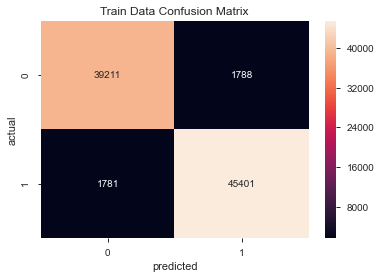

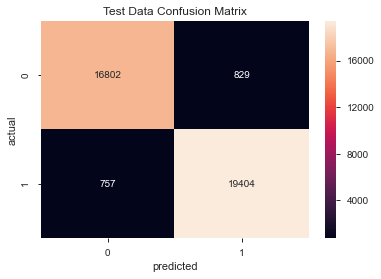

In [483]:

sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [484]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))


The overall accuracy score for the Train Data is :  0.9595264285957292
The overall accuracy score for the Test Data  is :  0.9580334462320068


In [485]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     40999
           1       0.96      0.96      0.96     47182

    accuracy                           0.96     88181
   macro avg       0.96      0.96      0.96     88181
weighted avg       0.96      0.96      0.96     88181



In [486]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     17631
           1       0.96      0.96      0.96     20161

    accuracy                           0.96     37792
   macro avg       0.96      0.96      0.96     37792
weighted avg       0.96      0.96      0.96     37792



In [488]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False,duplicates='drop')

train_predict.head()

,actual,prob,predicted,Deciles
81433,0,0.003857,0,0
15397,1,0.991704,1,4
49130,1,0.991704,1,4
114912,1,0.991704,1,4
50858,1,0.747999,1,3


In [490]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False,duplicates='drop')

test_predict.head()

,actual,prob,predicted,Deciles
11224,1,0.991704,1,4
13951,1,0.991704,1,4
62642,1,0.991882,1,5
78373,0,0.139034,0,2
22304,0,0.329147,0,3


In [491]:
# Decile Analysis for train data
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [492]:

Decile_analysis_train1 = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_train1.columns = ['max_prob','min_prob','#1','#0','total']

In [493]:
Decile_analysis_train1

,max_prob,min_prob,#1,#0,total
Deciles,,,,,
6,0.992346,0.992346,6324.0,6.0,6330
5,0.991882,0.991882,4778.0,22.0,4800
4,0.991704,0.878409,24976.0,594.0,25570
3,0.866728,0.282142,10109.0,2804.0,12913
2,0.139034,0.065614,970.0,10354.0,11324
1,0.012036,0.012036,1.0,3945.0,3946
0,0.003857,0.000292,24.0,23274.0,23298


In [494]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test1 = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test1.columns = ['max_prob','min_prob','#1','#0','total']

In [495]:

Decile_analysis_test1

,max_prob,min_prob,#1,#0,total
Deciles,,,,,
6,0.992346,0.992346,2710.0,3.0,2713
5,0.991882,0.991882,2081.0,5.0,2086
4,0.991704,0.878409,10638.0,276.0,10914
3,0.866728,0.282142,4326.0,1226.0,5552
2,0.139034,0.028798,404.0,4407.0,4811
1,0.012036,0.012036,0.0,1814.0,1814
0,0.003857,0.000292,2.0,9900.0,9902


In [496]:

Decile_analysis_train1.to_csv('Decile_analysis_train1.csv')

Decile_analysis_test1.to_csv('Decile_analysis_test1.csv')